# Лабораторная работа №2. Гармоники

### Лодочникова Владлена. Группа №5130901/10202

### Упражнение 2.1 

Был загружен файл chap02.ipynb, просмотрены пояснения и примеры. 

### Упражнение 2.2

Напишем класс SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала. Cycles - число циклов со времени старта, frac - дробная часть, растущая от 0 до 1 за каждый период. np.modf -  разбивает каждое значение цикла на целую и дробную части. Здесь используется только дробная часть, которая сохраняется в frac. Это делается для получения фазы сигнала в каждой временной точке. normalize - нормализует и смещает фазы сигнала для получения конечных значений сигнала. 

In [5]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    """Represents a sawtooth signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        ts = np.asarray(ts)
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys


Далее постоим график сигнала. 

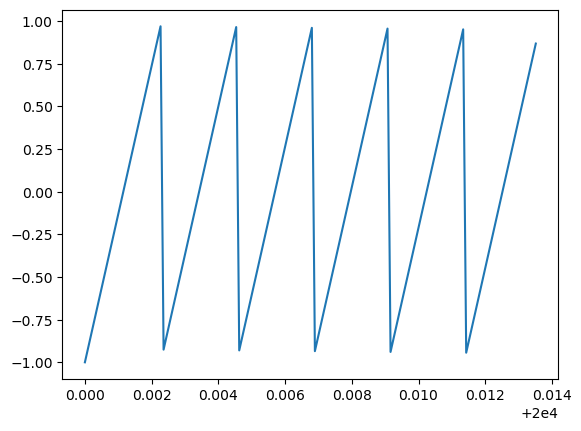

In [17]:
signal = SawtoothSignal() 
duration = signal.period*6
segment = signal.make_wave(duration, 20000) 
segment.plot()

Построим спектр графика сигнала. 

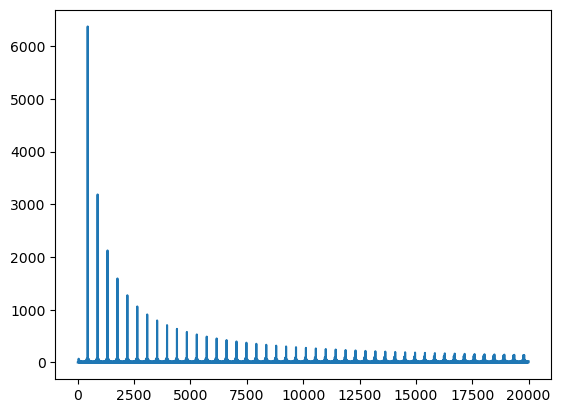

In [23]:
spec = SawtoothSignal().make_wave(duration=0.5,framerate=40000).make_spectrum() 
spec.plot()

Чтобы сравнить пилообразный спектор с треугольным и прямоугольным сигналами, построим их сигналы и спектры. 

Треугольный синал:

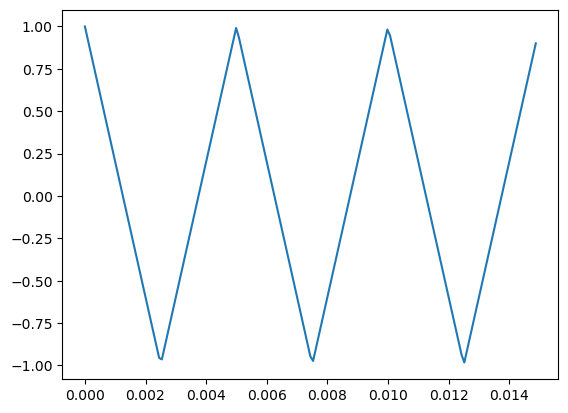

In [25]:
from thinkdsp import TriangleSignal
tri_signal = TriangleSignal(200)
tri_signal.plot()

Его спектр: 

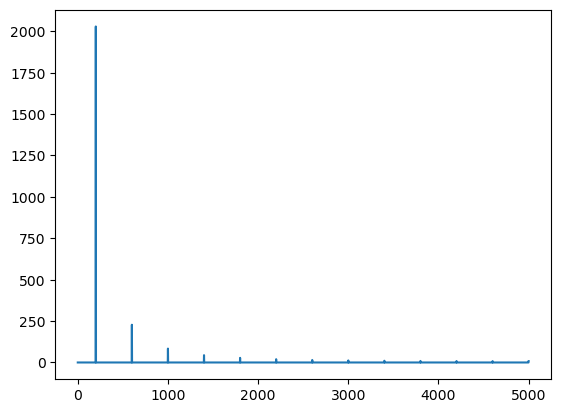

In [26]:
tri_wave = tri_signal.make_wave(duration=0.5, framerate=10000)
tri_spectrum = tri_wave.make_spectrum()
tri_spectrum.plot()

Прямоугоньный сигнал: 

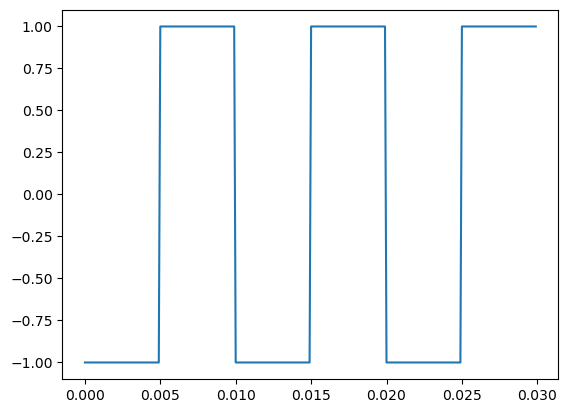

In [29]:
from thinkdsp import SquareSignal

squ_signal = SquareSignal(100)
duration = squ_signal.period*3
segment = squ_signal.make_wave(duration, framerate=10000)
segment.plot()

Его спектр: 

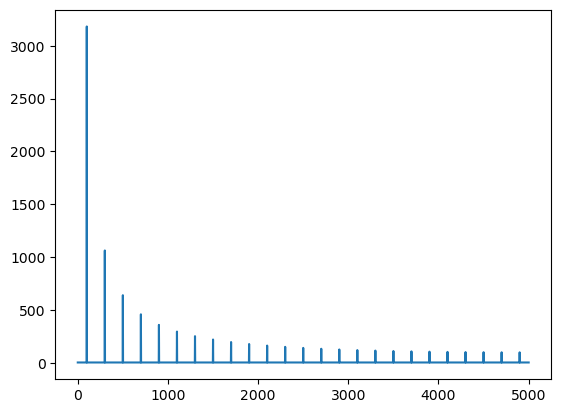

In [30]:
wave = squ_signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()

Пилообразный, треугольный и прямоугольный сигналы имеют разные спектры:

Пилообразный сигнал: состоит из гармоник с амплитудами, пропорциональными 1/f.
Треугольный сигнал: состоит из нечетных гармоник с амплитудами, пропорциональными 1/f^2.
Прямоугольный сигнал: состоит из нечетных гармоник с постоянными амплитудами.

Это означает, что пилообразный сигнал имеет более высокий уровень высокочастотных гармоник, треугольный сигнал имеет более низкий уровень высокочастотных гармоник, а прямоугольный сигнал имеет только нечетные гармоники с постоянной амплитудой.

### Упражнение 2.3


Создадим прямоугольный сигнал 1100 Гц и вычислим wave с выборкамии 10000 кадров в секунду.

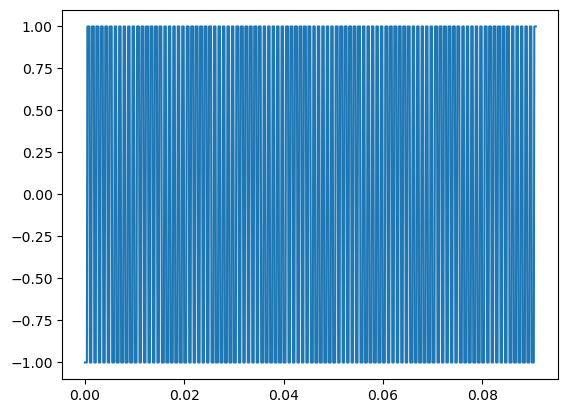

In [33]:
from thinkdsp import SquareSignal
signal = SquareSignal(1100)
duration = signal.period * 100
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()

Прослушаем:

In [34]:
wave = signal.make_wave(duration = 2, framerate = 10000)
wave.apodize()
wave.make_audio()

Построим спектор: 

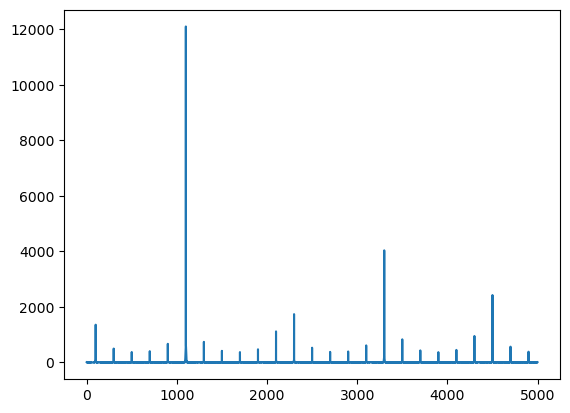

In [35]:
spectrum = wave.make_spectrum()
spectrum.plot()

Во время прослушивания слышится биение из-за того, что большинство гармоник были завернуты.

### Упражнение 2.4

Возьмём объект Spectrum и распечатаем несколько первых занчений spectrum.fs.

In [36]:
spectrum.fs[:5]

array([0. , 0.5, 1. , 1.5, 2. ])

Убедились, что первое значение spectrum.fs начинается с 0. 

1. Создадим треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 сек. Распечатаем сигнал. 

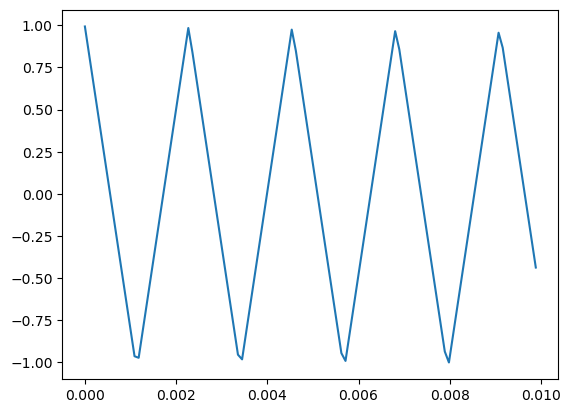

In [37]:
triangle = TriangleSignal(440).make_wave(duration = 0.01)
triangle.plot()

2. Создадим объект Spectrum и распечатаем Spectrum.hs[0]

In [38]:
spectrum = triangle.make_spectrum() 
spectrum.hs[0]

(1.0436096431476471e-14+0j)

В объекте Spectrum массив hs состоит из комплексных чисел, каждое из которых представляет частотную компоненту сигнала. Модуль комплексного числа пропорционален амплитуде соответствующей частотной компоненты, а аргумент (угол) соответствует фазе. Первый элемент массива hs является комплексным числом с нулевой мнимой частью и очень маленькой действительной частью, которая близка к нулю. Это соответствует постоянной компоненте сигнала.

3. Установим Spectrum.hs[0] = 100. 

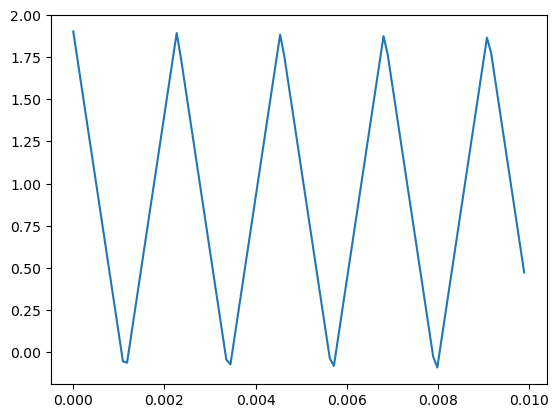

In [39]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()

После увеличения Spectrum.hs[0] на 100 видим, что высота графика увеличилась. 

### Упражнение 2.5
Напишем функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответствующую частоту из fs. 

In [40]:
def filter_spectrum(spectrum):
    """Divides the spectrum through by the fs.
    
    spectrum: Spectrum object
    """
    # avoid division by 0
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

Проверим функцию на прямоугольном сигнале.
Для начала прослушаем прямоугольный сигнал до применения созданной функции. 

In [44]:
wave = SquareSignal(440).make_wave(duration = 1)
wave.make_audio()

Далее построим спектр. ( До применения функции )

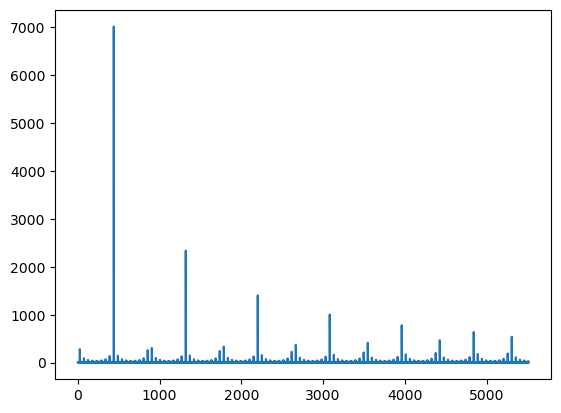

In [46]:
spec = wave.make_spectrum()
spec.plot()

Применим функцию и ппосмотрим на изменения. 

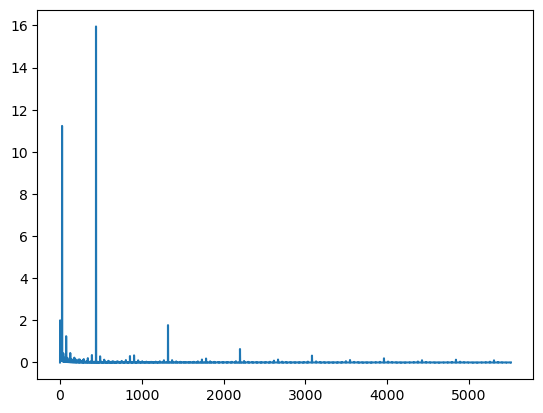

In [47]:
filter_spectrum(spec)
spec.plot()
spec.make_wave().make_audio()

Эта функция работает как фильтр низких частот, который пропускает низкочастотные компоненты сигнала и ослабляет высокочастотные. В результате второй звук звучит более "чисто" и "приглушенно", потому что высокочастотные шумы и искажения удалены. Этот фильтр может быть полезен для уменьшения шума в аудиосигнале или для создания специальных эффектов, таких как "мягкий" или "теплый" звук.

### Упражнение 2.6

Найдём сигнал, состоящий из чётных и нечётных гармоник, спадающих пропорционально 1/f^2. Для этого создадим пилообразный сигнал и применим к нему функцию, написанную в прошлом упражении.

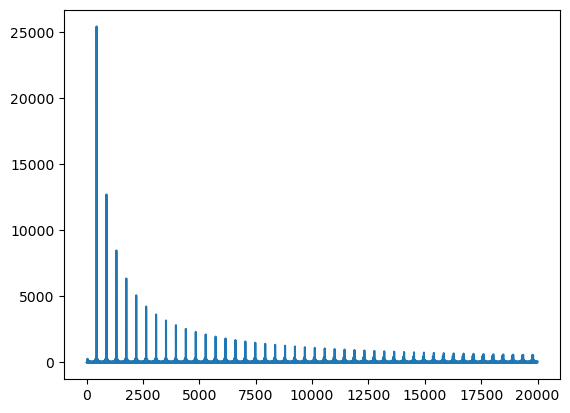

In [52]:
saw = SawtoothSignal(440)
saw_wave = saw.make_wave(duration=2, framerate=40000)
saw_spec =  saw_wave.make_spectrum()
saw_spec.plot()

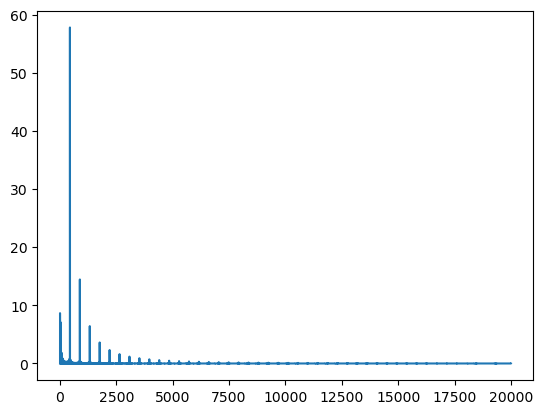

In [53]:
filter_spectrum(saw_spec)
saw_spec.plot()